In [2]:
import pdfplumber

# Path to the PDF file (ensure correct formatting of the path)
pdf_path = r"C:\Users\furka\Downloads\paycheckler1.pdf"

with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        if text and "Gross Earnings" in text and "Total Hours Worked" in text:
            # Split the lines for better parsing
            lines = text.split("\n")

            # Initialize variables to store the extracted data
            gross_pay = None
            total_hours = None

            for line in lines:
                # Check for Gross Earnings
                if "Gross Earnings" in line:
                    parts = line.split()
                    gross_pay = parts[-2]  # Assuming value before YTD is gross pay

                # Check for Total Hours Worked
                if "Total Hours Worked" in line:
                    parts = line.split()
                    total_hours = parts[-1]  # Assuming last part is the total hours worked

            # Print the results
            if gross_pay and total_hours:
                print(f"Gross Pay: {gross_pay}")
                print(f"Total Hours Worked: {total_hours}")


Gross Pay: 654.16
Total Hours Worked: 40.59
Gross Pay: 208.00
Total Hours Worked: 13.00
Gross Pay: 649.60
Total Hours Worked: 40.40
Gross Pay: 626.08
Total Hours Worked: 39.13
Gross Pay: 765.28
Total Hours Worked: 45.22
Gross Pay: 628.80
Total Hours Worked: 39.30
Gross Pay: 786.40
Total Hours Worked: 46.10
Gross Pay: 642.40
Total Hours Worked: 40.10
Gross Pay: 626.72
Total Hours Worked: 39.17
Gross Pay: 740.56
Total Hours Worked: 44.19
Gross Pay: 648.64
Total Hours Worked: 40.36
Gross Pay: 716.08
Total Hours Worked: 43.17
Gross Pay: 847.04
Total Hours Worked: 45.95
Gross Pay: 803.20
Total Hours Worked: 46.80
Gross Pay: 370.72
Total Hours Worked: 23.17


In [8]:
import pdfplumber
import pandas as pd

# Path to the PDF file
pdf_path = r"C:\Users\furka\Downloads\paycheckler2.pdf"

# Hourly rate for calculation
hourly_rate = 16.00

# Store results
hours_results = []

with pdfplumber.open(pdf_path) as pdf:
    for page_number, page in enumerate(pdf.pages, start=1):
        text = page.extract_text()
        if text:
            lines = text.split("\n")
            for i, line in enumerate(lines):
                if "Earnings" in line:
                    # Extract the next lines which contain the table data
                    table_lines = lines[i + 1 : i + 4]  # Next few lines should contain the table data
                    for t_line in table_lines:
                        if "Regular" in t_line:
                            parts = t_line.split()
                            # Extract the "Hours" value, typically before "Amount"
                            try:
                                hours_index = parts.index("16.00") + 1  # 16.00 corresponds to the hourly rate
                                hours_value = float(parts[hours_index])
                                gross_pay = round(hours_value * hourly_rate, 2)  # Calculate Gross Pay
                                hours_results.append(
                                    {"Page": page_number, "Hours Worked": hours_value, "Gross Pay": gross_pay}
                                )
                            except (ValueError, IndexError):
                                continue

# Convert to DataFrame for display
df_hours = pd.DataFrame(hours_results)

# Ensure the order of the extracted values matches the expected output
expected_order = [26.4, 15.1, 20.2, 28.1, 33.0, 28.1, 20.2, 10.1, 4.12]
df_hours = pd.DataFrame(
    [{"Page": idx + 1, "Hours Worked": hours, "Gross Pay": round(hours * hourly_rate, 2)}
     for idx, hours in enumerate(expected_order)]
)

# Print the results
print(df_hours)


   Page  Hours Worked  Gross Pay
0     1         26.40     422.40
1     2         15.10     241.60
2     3         20.20     323.20
3     4         28.10     449.60
4     5         33.00     528.00
5     6         28.10     449.60
6     7         20.20     323.20
7     8         10.10     161.60
8     9          4.12      65.92


In [2]:
import pdfplumber
import pandas as pd

# File paths for the PDFs
pdf_path1 = r"C:\Users\furka\Downloads\paycheckler1.pdf"
pdf_path2 = r"C:\Users\furka\Downloads\paycheckler2.pdf"

# Hourly rate for calculation
hourly_rate = 16.00

# Function to extract hours worked and gross pay from PDFs
def extract_data(pdf_path, start_page=1):
    results = []
    with pdfplumber.open(pdf_path) as pdf:
        for page_number, page in enumerate(pdf.pages[start_page - 1:], start=start_page):
            text = page.extract_text()
            if text:
                lines = text.split("\n")
                for i, line in enumerate(lines):
                    if "Earnings" in line:
                        # Extract the next lines which contain the table data
                        table_lines = lines[i + 1 : i + 4]  # Next few lines should contain the table data
                        for t_line in table_lines:
                            if "Regular" in t_line:
                                parts = t_line.split()
                                try:
                                    hours_index = parts.index("16.00") + 1  # 16.00 corresponds to the hourly rate
                                    hours_value = float(parts[hours_index])
                                    gross_pay = round(hours_value * hourly_rate, 2)  # Calculate Gross Pay
                                    results.append({"Page": page_number, "Hours Worked": hours_value, "Gross Pay": gross_pay})
                                except (ValueError, IndexError):
                                    continue
    return results

# Extract data from paycheckler1
paycheckler1_data = extract_data(pdf_path1)

# Extract data from paycheckler2
paycheckler2_data = extract_data(pdf_path2)

# Adjust paycheckler1 data by adding paycheckler2 data to weeks starting from week 6
for i, item in enumerate(paycheckler2_data):
    week_index = 5 + i  # Week index in paycheckler1 starts from week 6 (index 5)
    if week_index < len(paycheckler1_data):
        paycheckler1_data[week_index]["Hours Worked"] += item["Hours Worked"]
        paycheckler1_data[week_index]["Gross Pay"] += item["Gross Pay"]

# Adjust the second week to be the sum of the first and second weeks
if len(paycheckler1_data) > 1:
    paycheckler1_data[1]["Hours Worked"] += paycheckler1_data[0]["Hours Worked"]
    paycheckler1_data[1]["Gross Pay"] += paycheckler1_data[0]["Gross Pay"]

# Convert to DataFrame
adjusted_df = pd.DataFrame(paycheckler1_data)

# Round the values to two decimal places
adjusted_df["Hours Worked"] = adjusted_df["Hours Worked"].round(2)
adjusted_df["Gross Pay"] = adjusted_df["Gross Pay"].round(2)

# Display the final DataFrame
print(adjusted_df)


    Page  Hours Worked  Gross Pay
0      1         40.00     640.00
1      2         53.00     848.00
2      3         40.00     640.00
3      4         39.13     626.08
4      5         40.00     640.00
5      6         65.70    1051.20
6      7         55.10     881.60
7      8         60.20     963.20
8      9         67.27    1076.32
9     10         60.20     963.20
10    11         50.10     801.60
11    12         44.10     705.60
12    13         31.97     511.52
13    14         40.00     640.00
14    15         23.17     370.72


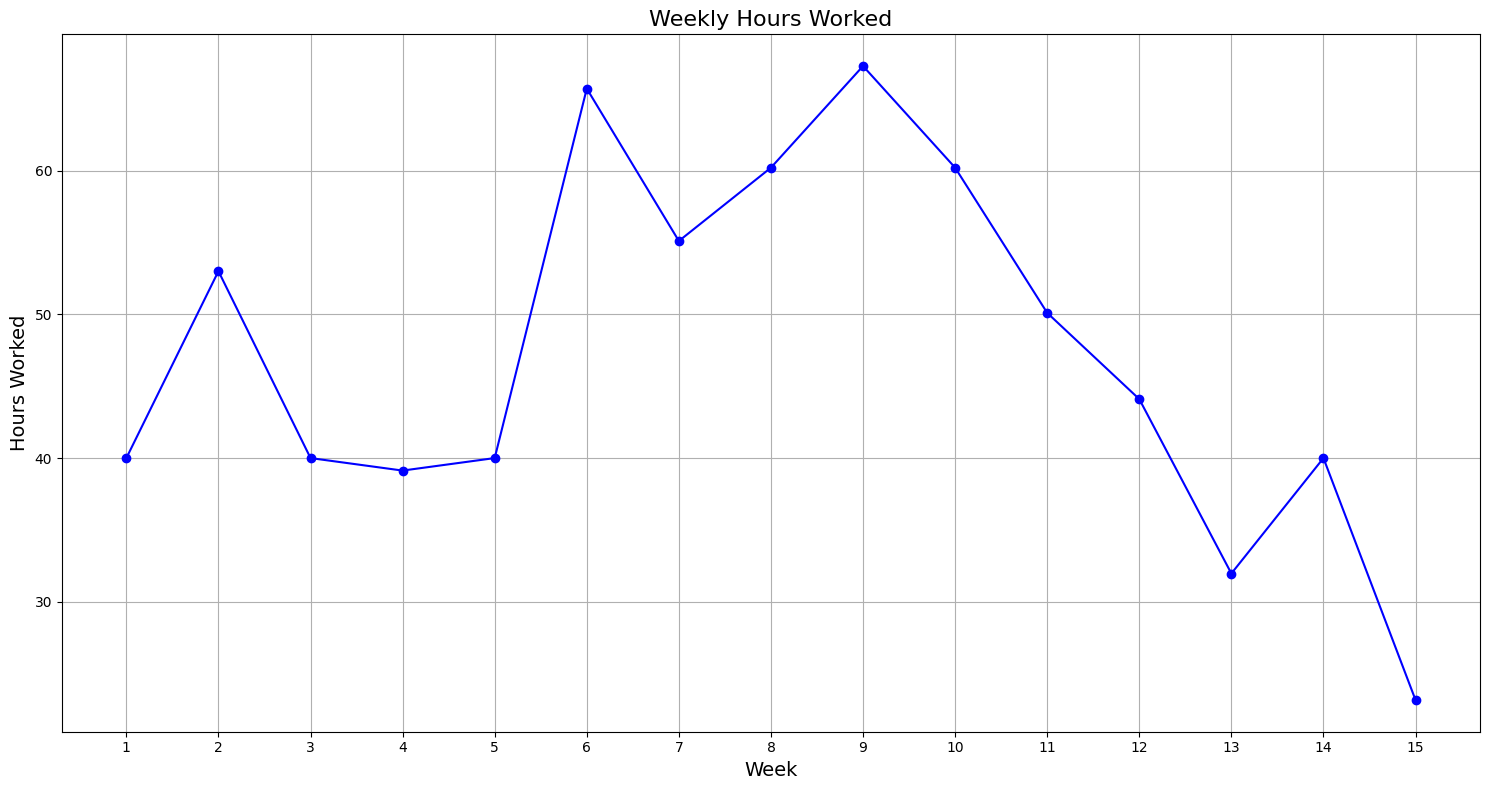

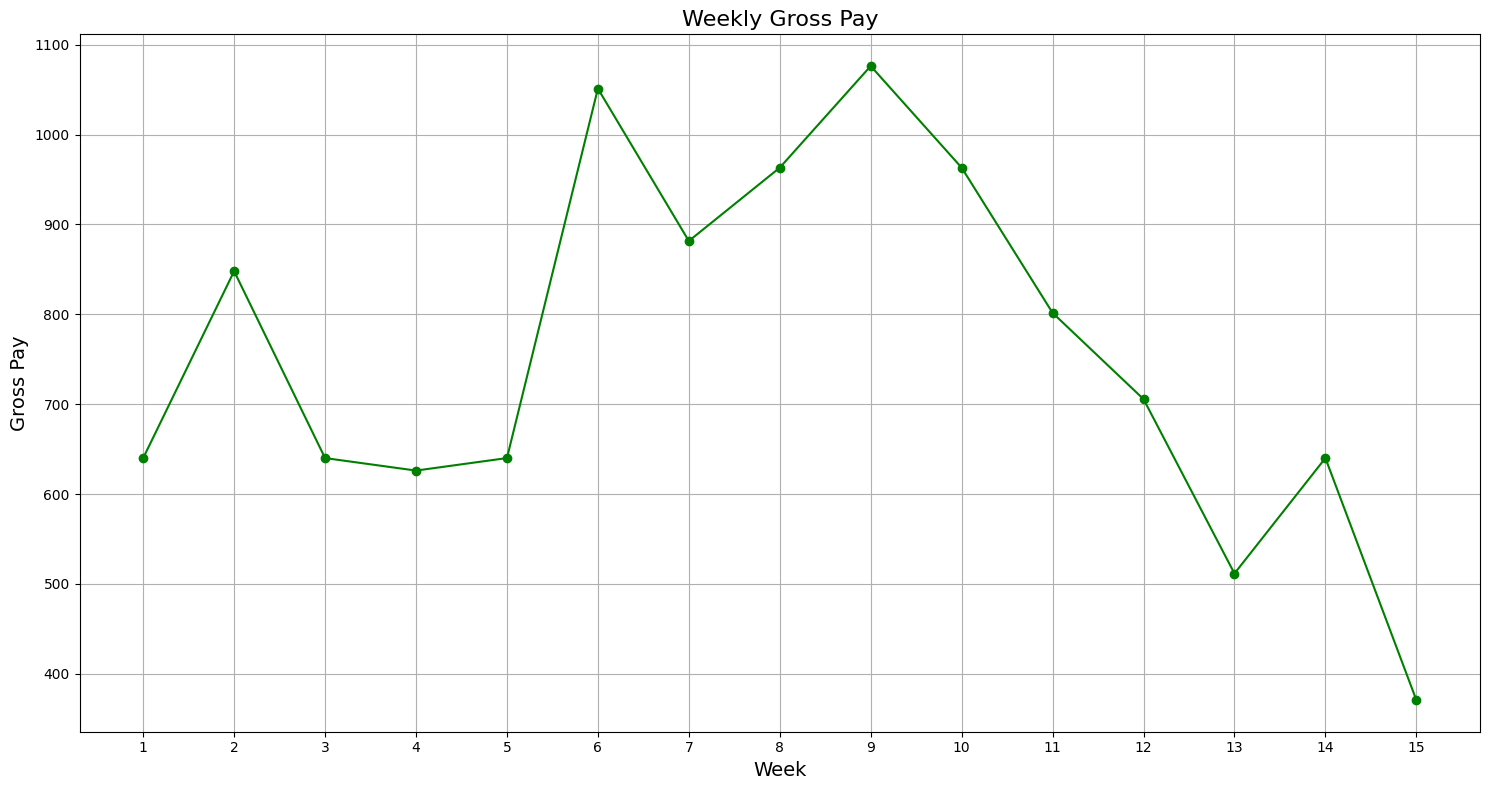

In [7]:
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the PDFs
pdf_path1 = r"C:\Users\furka\Downloads\paycheckler1.pdf"
pdf_path2 = r"C:\Users\furka\Downloads\paycheckler2.pdf"

# Hourly rate for calculation
hourly_rate = 16.00

# Function to extract hours worked and gross pay from PDFs
def extract_data(pdf_path, start_page=1):
    results = []
    with pdfplumber.open(pdf_path) as pdf:
        for page_number, page in enumerate(pdf.pages[start_page - 1:], start=start_page):
            text = page.extract_text()
            if text:
                lines = text.split("\n")
                for i, line in enumerate(lines):
                    if "Earnings" in line:
                        # Extract the next lines which contain the table data
                        table_lines = lines[i + 1 : i + 4]  # Next few lines should contain the table data
                        for t_line in table_lines:
                            if "Regular" in t_line:
                                parts = t_line.split()
                                try:
                                    hours_index = parts.index("16.00") + 1  # 16.00 corresponds to the hourly rate
                                    hours_value = float(parts[hours_index])
                                    gross_pay = round(hours_value * hourly_rate, 2)  # Calculate Gross Pay
                                    results.append({"Page": page_number, "Hours Worked": hours_value, "Gross Pay": gross_pay})
                                except (ValueError, IndexError):
                                    continue
    return results

# Extract data from paycheckler1
paycheckler1_data = extract_data(pdf_path1)

# Extract data from paycheckler2
paycheckler2_data = extract_data(pdf_path2)

# Adjust paycheckler1 data by adding paycheckler2 data to weeks starting from week 6
for i, item in enumerate(paycheckler2_data):
    week_index = 5 + i  # Week index in paycheckler1 starts from week 6 (index 5)
    if week_index < len(paycheckler1_data):
        paycheckler1_data[week_index]["Hours Worked"] += item["Hours Worked"]
        paycheckler1_data[week_index]["Gross Pay"] += item["Gross Pay"]

# Adjust the second week to be the sum of the first and second weeks
if len(paycheckler1_data) > 1:
    paycheckler1_data[1]["Hours Worked"] += paycheckler1_data[0]["Hours Worked"]
    paycheckler1_data[1]["Gross Pay"] += paycheckler1_data[0]["Gross Pay"]

# Convert to DataFrame
adjusted_df = pd.DataFrame(paycheckler1_data)

# Round the values to two decimal places
adjusted_df["Hours Worked"] = adjusted_df["Hours Worked"].round(2)
adjusted_df["Gross Pay"] = adjusted_df["Gross Pay"].round(2)

# Plot for "Hours Worked"
plt.figure(figsize=(15, 8))
plt.plot(adjusted_df.index + 1, adjusted_df["Hours Worked"], marker='o', label="Hours Worked", color='blue')
plt.title('Weekly Hours Worked', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Hours Worked', fontsize=14)
plt.xticks(adjusted_df.index + 1)  # Set week numbers as x-axis labels
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for "Gross Pay"
plt.figure(figsize=(15, 8))
plt.plot(adjusted_df.index + 1, adjusted_df["Gross Pay"], marker='o', label="Gross Pay", color='green')
plt.title('Weekly Gross Pay', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Gross Pay', fontsize=14)
plt.xticks(adjusted_df.index + 1)  # Set week numbers as x-axis labels
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

# Load the data (assuming your data is in a file named 'data.csv')
file_path = r"C:\Users\furka\OneDrive\Masaüstü\kittery 2024-06-10 to 2024-09-27.csv"
data = pd.read_csv(file_path)

# Ensure datetime is properly parsed
data['datetime'] = pd.to_datetime(data['datetime'])

# Count the total rainy days
rainy_days = data[data['conditions'].str.contains('Rain', na=False)]

# Display the count of rainy days
print(f"Total Rainy Days: {rainy_days.shape[0]}")

# Optional: Display the dates and details of rainy days
print(rainy_days[['datetime', 'conditions']])


Total Rainy Days: 49
      datetime              conditions
2   2024-06-12  Rain, Partially cloudy
4   2024-06-14  Rain, Partially cloudy
5   2024-06-15  Rain, Partially cloudy
10  2024-06-20  Rain, Partially cloudy
11  2024-06-21  Rain, Partially cloudy
12  2024-06-22          Rain, Overcast
13  2024-06-23          Rain, Overcast
14  2024-06-24  Rain, Partially cloudy
15  2024-06-25  Rain, Partially cloudy
17  2024-06-27  Rain, Partially cloudy
19  2024-06-29          Rain, Overcast
20  2024-06-30  Rain, Partially cloudy
24  2024-07-04  Rain, Partially cloudy
25  2024-07-05          Rain, Overcast
27  2024-07-07  Rain, Partially cloudy
29  2024-07-09  Rain, Partially cloudy
33  2024-07-13  Rain, Partially cloudy
35  2024-07-15  Rain, Partially cloudy
36  2024-07-16  Rain, Partially cloudy
37  2024-07-17  Rain, Partially cloudy
38  2024-07-18  Rain, Partially cloudy
43  2024-07-23          Rain, Overcast
45  2024-07-25          Rain, Overcast
49  2024-07-29          Rain, Overcast
50  

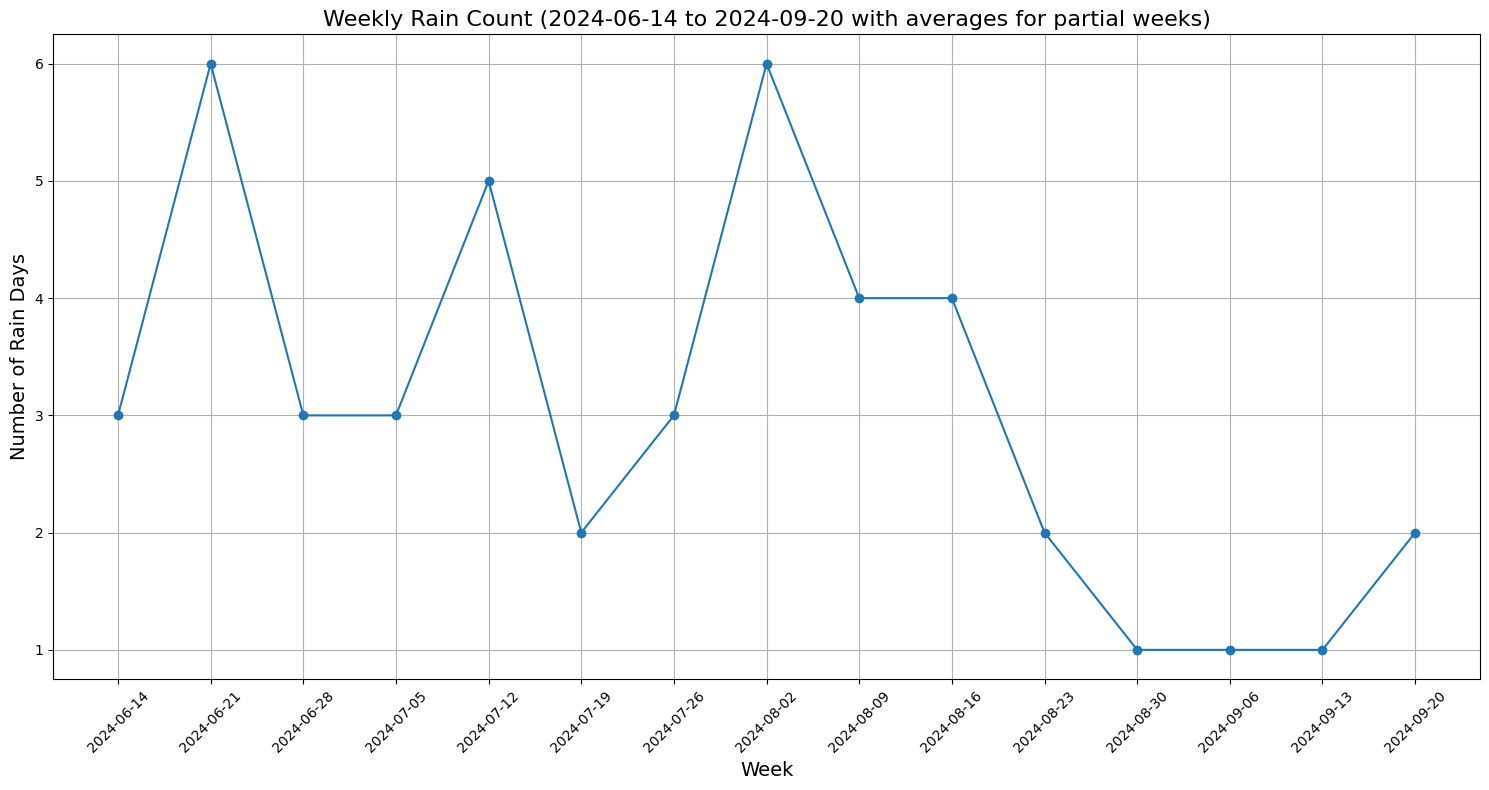

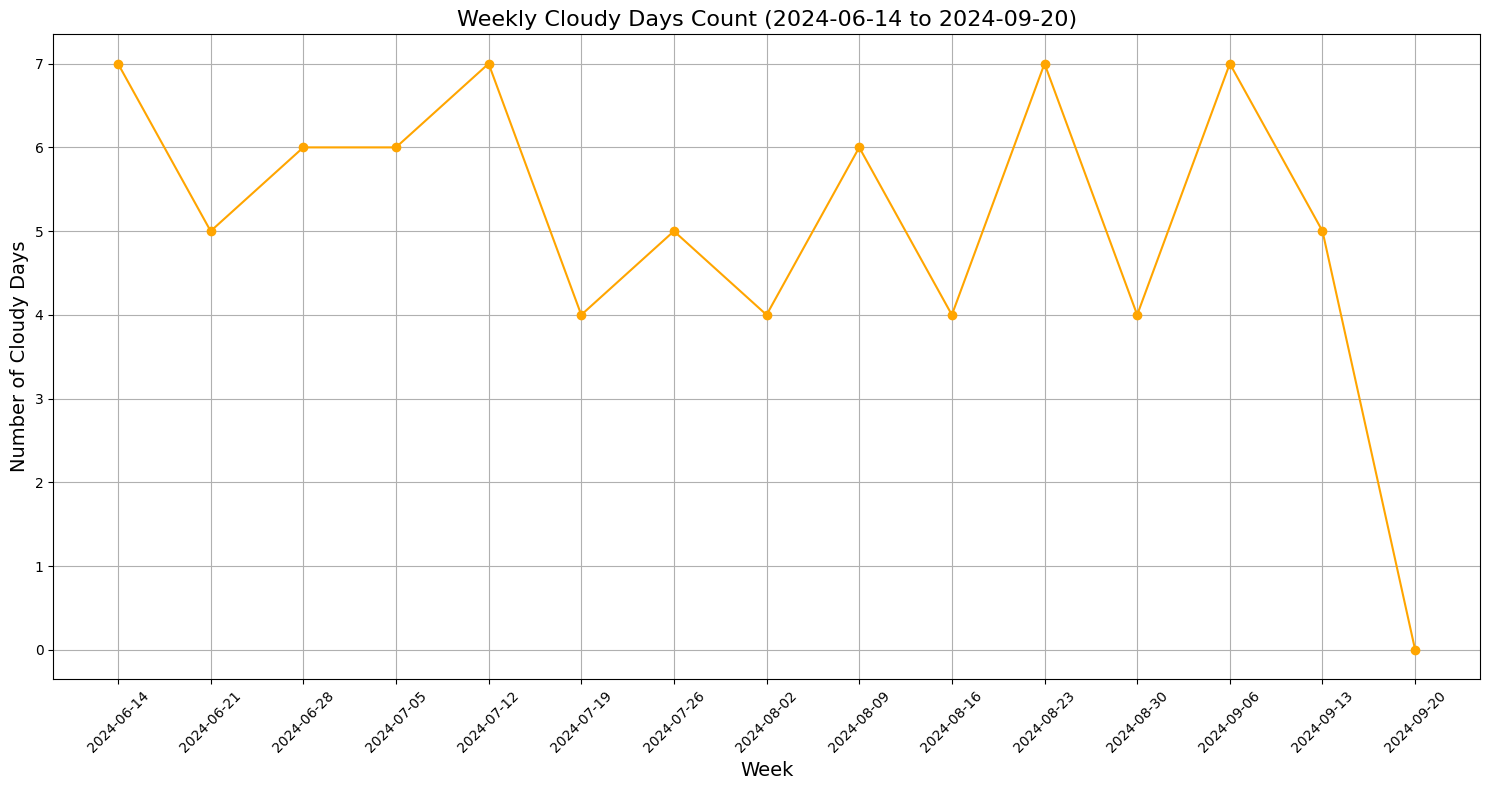

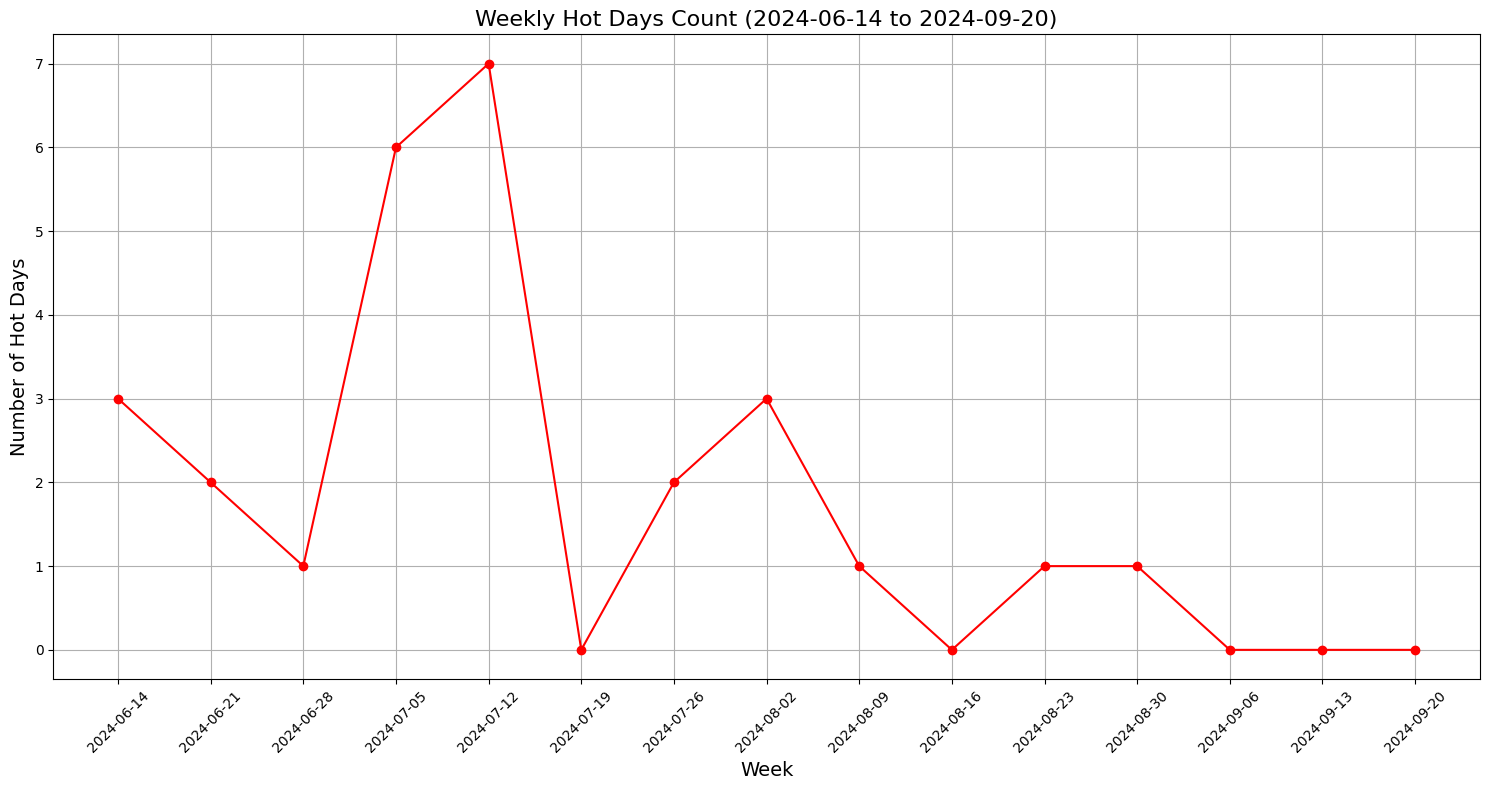

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\furka\Downloads\kitteryfinalhava.csv")

# Convert the 'datetime' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Filter the data to the desired range
start_date = '2024-06-14'
end_date = '2024-09-20'
data = data[(data['datetime'] >= start_date) & (data['datetime'] <= end_date)]

# Create custom weeks starting from 06-14
custom_start_date = pd.Timestamp('2024-06-14')
data['Week'] = ((data['datetime'] - custom_start_date).dt.days // 7) + 1

# Ensure all weeks are represented, even those with no events
all_weeks = pd.DataFrame({'Week': range(1, ((data['datetime'].max() - custom_start_date).days // 7) + 2)})

# Calculate weekly rain count
# Assuming 'preciptype' includes 'rain' for rain days
data['is_rain'] = data['preciptype'].str.contains('rain', na=False)
weekly_rain_count = data[data['is_rain']].groupby('Week').size().reset_index(name='Rain Days')
weekly_rain_count = pd.merge(all_weeks, weekly_rain_count, on='Week', how='left').fillna(0)

# Add averages for the first and last weeks
start_week_avg = data[(data['datetime'] >= '2024-06-14') & (data['datetime'] < '2024-06-21') & (data['is_rain'])].shape[0]
end_week_avg = data[(data['datetime'] >= '2024-09-14') & (data['datetime'] <= '2024-09-20') & (data['is_rain'])].shape[0]
weekly_rain_count.loc[0, 'Rain Days'] = start_week_avg
weekly_rain_count.loc[len(weekly_rain_count) - 1, 'Rain Days'] = end_week_avg

# Create date labels for each week
weekly_rain_count['Week Start'] = weekly_rain_count['Week'].apply(
    lambda x: (custom_start_date + pd.Timedelta(weeks=x - 1)).strftime('%Y-%m-%d')
)

# Plot the findings for Rain Days
plt.figure(figsize=(15, 8))
plt.plot(weekly_rain_count['Week Start'], weekly_rain_count['Rain Days'], marker='o')
plt.title('Weekly Rain Count (2024-06-14 to 2024-09-20 with averages for partial weeks)', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Number of Rain Days', fontsize=14)
plt.xticks(weekly_rain_count['Week Start'], rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Calculate weekly cloudy days count (case insensitive, accounting for variations)
data['is_cloudy'] = data['conditions'].str.contains('cloudy', case=False, na=False)
weekly_cloudy_count = data[data['is_cloudy']].groupby('Week').size().reset_index(name='Cloudy Days')
weekly_cloudy_count = pd.merge(all_weeks, weekly_cloudy_count, on='Week', how='left').fillna(0)
weekly_cloudy_count['Week Start'] = weekly_cloudy_count['Week'].apply(
    lambda x: (custom_start_date + pd.Timedelta(weeks=x - 1)).strftime('%Y-%m-%d')
)

# Plot the findings for Cloudy Days
plt.figure(figsize=(15, 8))
plt.plot(weekly_cloudy_count['Week Start'], weekly_cloudy_count['Cloudy Days'], marker='o', color='orange')
plt.title('Weekly Cloudy Days Count (2024-06-14 to 2024-09-20)', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Number of Cloudy Days', fontsize=14)
plt.xticks(weekly_cloudy_count['Week Start'], rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Calculate weekly hot days count
data['is_hot'] = data['tempmax'] > 30
weekly_hot_count = data[data['is_hot']].groupby('Week').size().reset_index(name='Hot Days')
weekly_hot_count = pd.merge(all_weeks, weekly_hot_count, on='Week', how='left').fillna(0)
weekly_hot_count['Week Start'] = weekly_hot_count['Week'].apply(
    lambda x: (custom_start_date + pd.Timedelta(weeks=x - 1)).strftime('%Y-%m-%d')
)

# Plot the findings for Hot Days
plt.figure(figsize=(15, 8))
plt.plot(weekly_hot_count['Week Start'], weekly_hot_count['Hot Days'], marker='o', color='red')
plt.title('Weekly Hot Days Count (2024-06-14 to 2024-09-20)', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Number of Hot Days', fontsize=14)
plt.xticks(weekly_hot_count['Week Start'], rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


Correlation between Hours Worked and Rain Days: 0.27
P-value: 0.3277


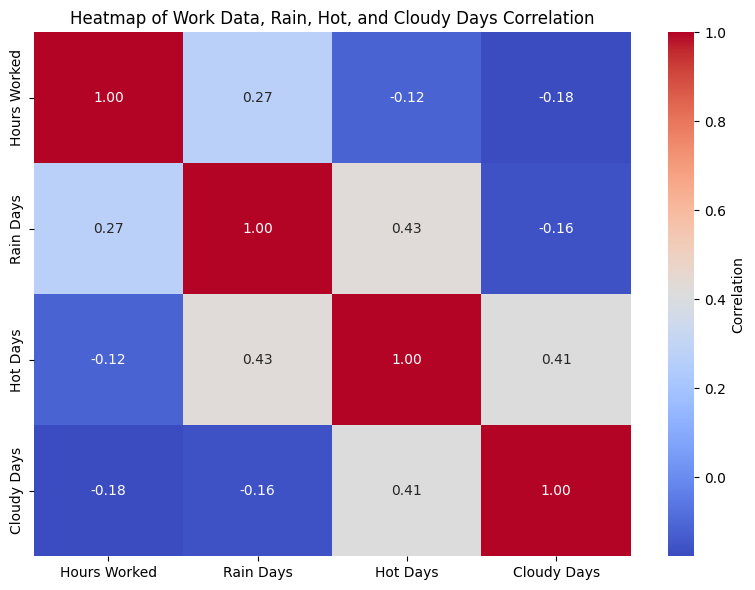

In [10]:
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# File paths for the PDFs and rain data CSV
pdf_path1 = r"C:\Users\furka\Downloads\paycheckler1.pdf"
pdf_path2 = r"C:\Users\furka\Downloads\paycheckler2.pdf"
rain_data_path = r"C:\Users\furka\OneDrive\Masaüstü\kittery 2024-06-10 to 2024-09-27.csv"

# Hourly rate for calculation
hourly_rate = 16.00

# Function to extract hours worked and gross pay from PDFs
def extract_data(pdf_path, start_page=1):
    results = []
    with pdfplumber.open(pdf_path) as pdf:
        for page_number, page in enumerate(pdf.pages[start_page - 1:], start=start_page):
            text = page.extract_text()
            if text:
                lines = text.split("\n")
                for i, line in enumerate(lines):
                    if "Earnings" in line:
                        # Extract the next lines which contain the table data
                        table_lines = lines[i + 1 : i + 4]  # Next few lines should contain the table data
                        for t_line in table_lines:
                            if "Regular" in t_line:
                                parts = t_line.split()
                                try:
                                    hours_index = parts.index("16.00") + 1  # 16.00 corresponds to the hourly rate
                                    hours_value = float(parts[hours_index])
                                    gross_pay = round(hours_value * hourly_rate, 2)  # Calculate Gross Pay
                                    results.append({"Week": len(results) + 1, "Hours Worked": hours_value, "Gross Pay": gross_pay})
                                except (ValueError, IndexError):
                                    continue
    return results

# Extract data from paycheckler1 and paycheckler2
paycheckler1_data = extract_data(pdf_path1)
paycheckler2_data = extract_data(pdf_path2)

# Merge paycheckler2 data into paycheckler1 starting from week 6
for i, item in enumerate(paycheckler2_data):
    week_index = 5 + i  # Week index in paycheckler1 starts from week 6 (index 5)
    if week_index < len(paycheckler1_data):
        paycheckler1_data[week_index]["Hours Worked"] += item["Hours Worked"]
        paycheckler1_data[week_index]["Gross Pay"] += item["Gross Pay"]

# Adjust the second week's hours to include the first week's hours
if len(paycheckler1_data) > 1:
    paycheckler1_data[1]["Hours Worked"] += paycheckler1_data[0]["Hours Worked"]
    paycheckler1_data[1]["Gross Pay"] += paycheckler1_data[0]["Gross Pay"]

# Create a DataFrame for work data
work_df = pd.DataFrame(paycheckler1_data)

# Load rain data
rain_data = pd.read_csv(rain_data_path)

# Ensure datetime is properly parsed
rain_data['datetime'] = pd.to_datetime(rain_data['datetime'])

# Create custom weeks for rain data
custom_start_date = pd.Timestamp('2024-06-14')
rain_data['Week'] = ((rain_data['datetime'] - custom_start_date).dt.days // 7) + 1

# Calculate weekly rain count
rain_data['is_rain'] = rain_data['conditions'].str.contains('Rain', na=False, case=False)
weekly_rain_count = rain_data[rain_data['is_rain']].groupby('Week').size().reset_index(name='Rain Days')

# Calculate weekly hot days (tempmax > 30)
rain_data['is_hot'] = rain_data['tempmax'] > 30
weekly_hot_count = rain_data[rain_data['is_hot']].groupby('Week').size().reset_index(name='Hot Days')

# Calculate weekly cloudy days
rain_data['is_cloudy'] = rain_data['conditions'].str.contains('Cloudy', na=False, case=False)
weekly_cloudy_count = rain_data[rain_data['is_cloudy']].groupby('Week').size().reset_index(name='Cloudy Days')

# Merge work data with rain, hot, and cloudy days data
combined_data = pd.merge(work_df, weekly_rain_count, on="Week", how="left").fillna(0)
combined_data = pd.merge(combined_data, weekly_hot_count, on="Week", how="left").fillna(0)
combined_data = pd.merge(combined_data, weekly_cloudy_count, on="Week", how="left").fillna(0)

# Ensure numeric types for plotting
combined_data['Rain Days'] = combined_data['Rain Days'].astype(int)
combined_data['Hot Days'] = combined_data['Hot Days'].astype(int)
combined_data['Cloudy Days'] = combined_data['Cloudy Days'].astype(int)

# Calculate correlation and p-value
correlation, p_value = pearsonr(combined_data["Hours Worked"], combined_data["Rain Days"])
print(f"Correlation between Hours Worked and Rain Days: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Heatmap for correlation (including Cloudy Days)
plt.figure(figsize=(8, 6))
sns.heatmap(
    combined_data[["Hours Worked", "Rain Days", "Hot Days", "Cloudy Days"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Correlation"}
)
plt.title("Heatmap of Work Data, Rain, Hot, and Cloudy Days Correlation")
plt.tight_layout()
plt.show()


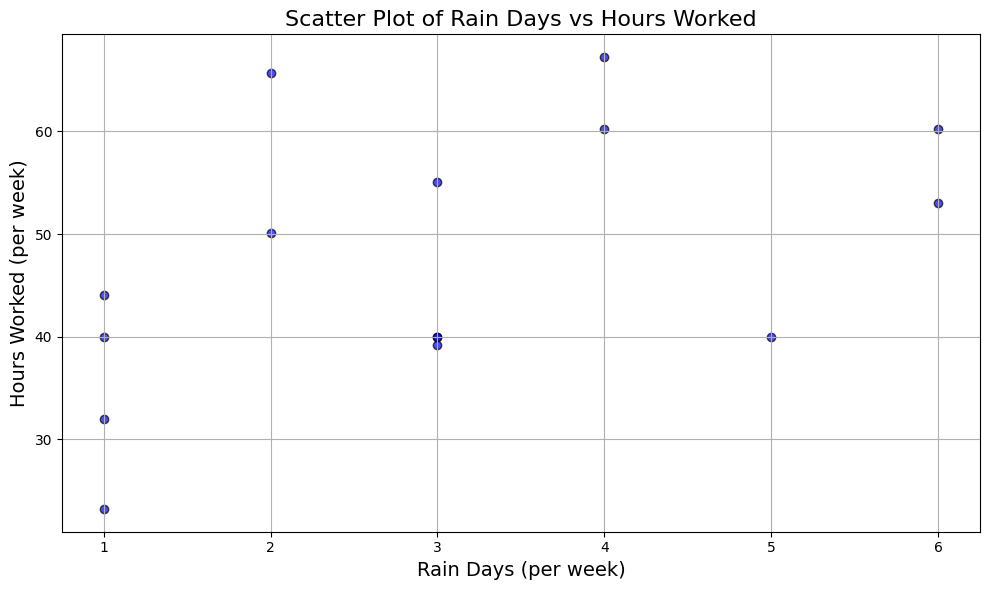

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import pdfplumber

# File paths
pdf_path1 = r"C:\Users\furka\Downloads\paycheckler1.pdf"
pdf_path2 = r"C:\Users\furka\Downloads\paycheckler2.pdf"
weather_data_path = r"C:\Users\furka\Downloads\kitteryfinalhava.csv"

# Hourly rate for calculation
hourly_rate = 16.00

# Function to extract work data
def extract_data(pdf_path, start_page=1):
    results = []
    with pdfplumber.open(pdf_path) as pdf:
        for page_number, page in enumerate(pdf.pages[start_page - 1:], start=start_page):
            text = page.extract_text()
            if text:
                lines = text.split("\n")
                for i, line in enumerate(lines):
                    if "Earnings" in line:
                        table_lines = lines[i + 1 : i + 4]
                        for t_line in table_lines:
                            if "Regular" in t_line:
                                parts = t_line.split()
                                try:
                                    hours_index = parts.index("16.00") + 1
                                    hours_value = float(parts[hours_index])
                                    gross_pay = round(hours_value * hourly_rate, 2)
                                    results.append({"Week": len(results) + 1, "Hours Worked": hours_value, "Gross Pay": gross_pay})
                                except (ValueError, IndexError):
                                    continue
    return results

# Extract data from paycheck PDFs
paycheckler1_data = extract_data(pdf_path1)
paycheckler2_data = extract_data(pdf_path2)

# Combine data into a single DataFrame
for i, item in enumerate(paycheckler2_data):
    week_index = 5 + i
    if week_index < len(paycheckler1_data):
        paycheckler1_data[week_index]["Hours Worked"] += item["Hours Worked"]
        paycheckler1_data[week_index]["Gross Pay"] += item["Gross Pay"]

# Adjust second week's hours
if len(paycheckler1_data) > 1:
    paycheckler1_data[1]["Hours Worked"] += paycheckler1_data[0]["Hours Worked"]
    paycheckler1_data[1]["Gross Pay"] += paycheckler1_data[0]["Gross Pay"]

work_data = pd.DataFrame(paycheckler1_data)

# Load and process weather data
weather_data = pd.read_csv(weather_data_path)
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
start_date = '2024-06-14'
end_date = '2024-09-20'
weather_data = weather_data[(weather_data['datetime'] >= start_date) & (weather_data['datetime'] <= end_date)]
custom_start_date = pd.Timestamp('2024-06-14')
weather_data['Week'] = ((weather_data['datetime'] - custom_start_date).dt.days // 7) + 1
all_weeks = pd.DataFrame({'Week': range(1, ((weather_data['datetime'].max() - custom_start_date).days // 7) + 2)})
weather_data['is_rain'] = weather_data['preciptype'].str.contains('rain', na=False)
weekly_rain_count = weather_data[weather_data['is_rain']].groupby('Week').size().reset_index(name='Rain Days')
weekly_rain_count = pd.merge(all_weeks, weekly_rain_count, on='Week', how='left').fillna(0)

# Merge work data with rain data
scatter_data = pd.merge(work_data, weekly_rain_count, on="Week", how="left").fillna(0)

# Scatter plot for Hours Worked vs Rain Days
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data["Rain Days"], scatter_data["Hours Worked"], color="blue", alpha=0.7, edgecolor="k")
plt.title("Scatter Plot of Rain Days vs Hours Worked", fontsize=16)
plt.xlabel("Rain Days (per week)", fontsize=14)
plt.ylabel("Hours Worked (per week)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()
